# Simulate Hydrogen Atom Electrons affected by Quantum Walk

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import imageio,os
%matplotlib inline
from numpy import pi

### Define all register we needed

In [2]:
QrC1 = QuantumRegister(1, 'coin1')
QrS1= QuantumRegister(2, 'space1')
Help1=QuantumRegister(1,'help1')
QrC2 = QuantumRegister(1, 'coin2')
QrS2= QuantumRegister(2, 'space2')
Help2=QuantumRegister(1,'help2')

Cr = ClassicalRegister(4)

### entangle set

This part of circuit make the two walkingspace of electron entangle. We created superposition on first qubit in space1 to make the starting point is 00or11(for space2 is 11or00)

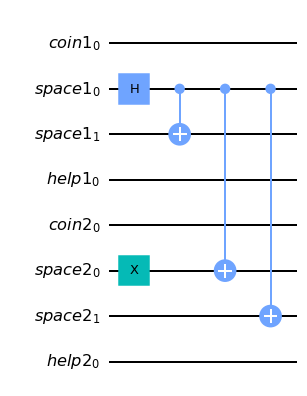

In [3]:
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='entangle')
qc.h(1)
qc.x(5)
qc.cx(1,2)
qc.cx(1,5)
qc.cx(1,6)
qc.draw('mpl')

## Coin set
The set  of the U2 gate is used to modify initial state and H gate is placed to create even probability of 1and 0 *We will only execute U2 once in the beginning

C:\Users\willy\AppData\Local\Temp/ipykernel_1752/1950713879.py:3: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])


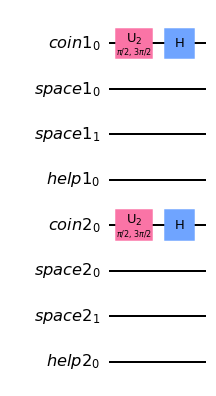

In [4]:
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='coin set')
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC2[0])
qc.h((0,4))
qc.draw('mpl')

## Prevent walk to 11 from 00
If the coin is 0, the walk will be backward. We make it walk forward first if the position is in 00 and  the coin is 0 to prevent it walk to 11 from 00. Don't worry that we didn't obey the rule. If the coin is 0, it will move back to 00 after executing the section 'walker'. 
Helpqubit is created to mark the situation mention above 

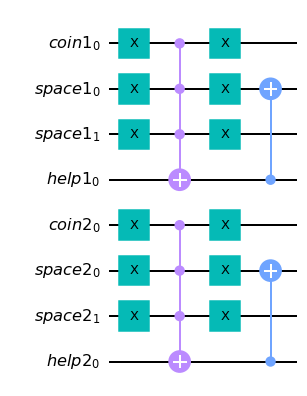

In [5]:
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='sit00')
qc.x((0,1,2,4,5,6))
qc.mcx([0,1,2],3)  
qc.mcx([4,5,6],7)
qc.x((0,1,2,4,5,6))
qc.cx(3,1)
qc.cx(7,5)
qc.draw('mpl')

## Prevent walk to 00 from 11
If the coin is 1, the walk will be forward. We make it walk backward first if the position is in 11 and the coin is 1 to prevent it walk to 00 from 11. Don't worry that we didn't obey the rule. If the coin is 1, it will move back to 11 after executing the section 'walker'. 
Helpqubit is created to mark the situation mention above 

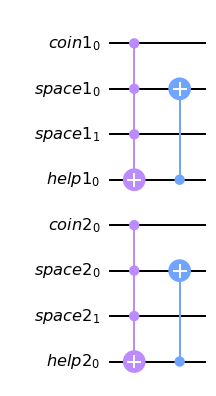

In [14]:
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='sit11')
qc.mcx([0,1,2],3)
qc.mcx([4,5,6],7)
qc.cx(3,1)
qc.cx(7,5)
qc.draw('mpl')

## Walker
this part of circuit implement the 'walk' section(if coin is 1 then walk forward,walk backward if coin is 0)

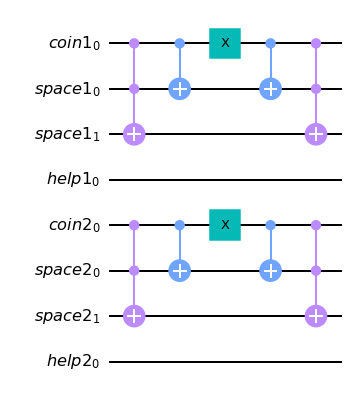

In [18]:
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='walker')
qc.ccx(0,1,2)
qc.ccx(4,5,6)
qc.cx(0,1)
qc.cx(4,5)
qc.x((0,4))
qc.cx(0,1)
qc.cx(4,5)
qc.ccx(0,1,2)
qc.ccx(4,5,6)
qc.draw('mpl')

## All circuit view

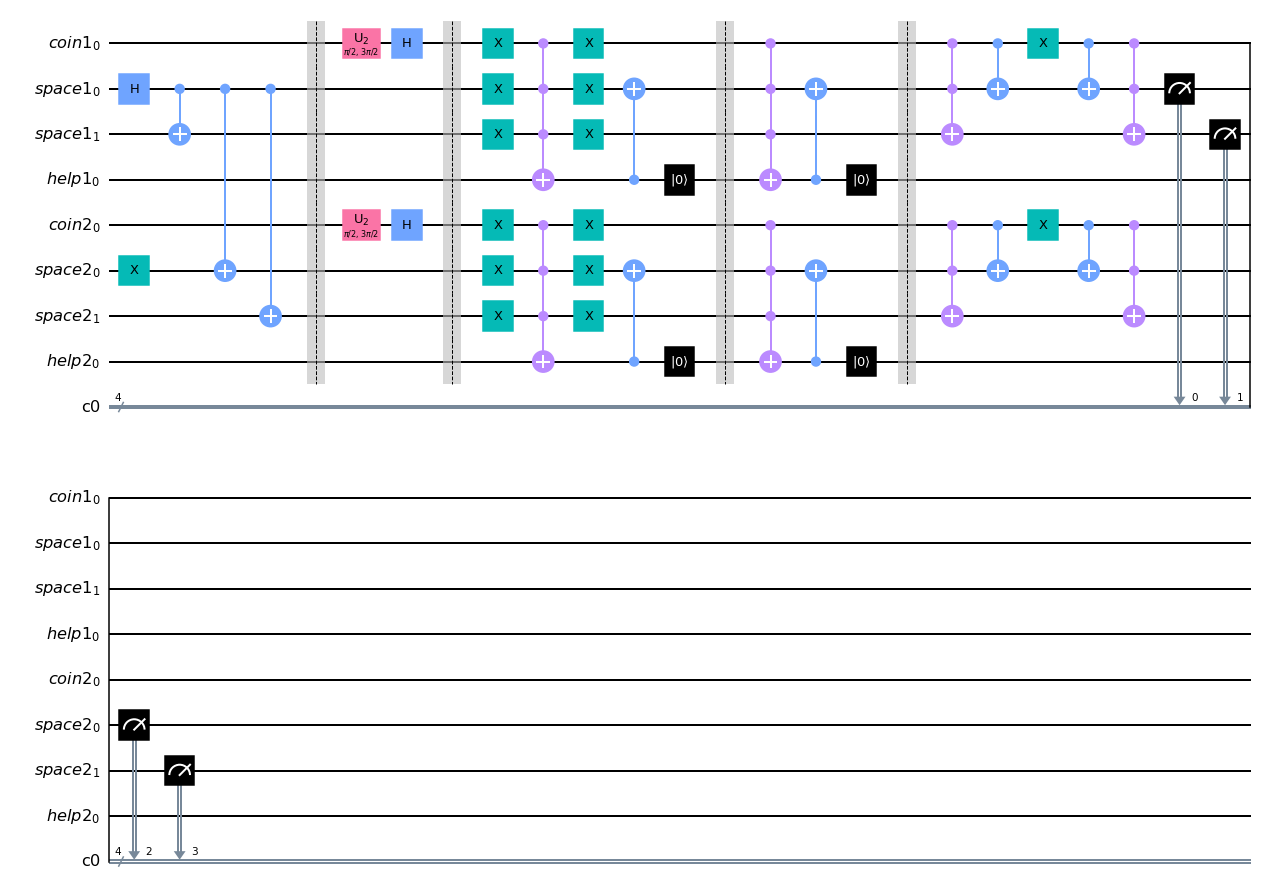

In [19]:
from qiskit.circuit.library.standard_gates import HGate
qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
qc.h(1)
qc.x(5)
qc.cx(1,2)
qc.cx(1,5)
qc.cx(1,6)
qc.barrier()
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC2[0])
qc.h((0,4))
qc.barrier()
qc.x((0,1,2,4,5,6))
qc.mcx([0,1,2],3)  
qc.mcx([4,5,6],7)
qc.x((0,1,2,4,5,6))
qc.cx(3,1)
qc.cx(7,5)
qc.reset((3,7))
qc.barrier()
qc.mcx([0,1,2],3)
qc.mcx([4,5,6],7)
qc.cx(3,1)
qc.cx(7,5)
qc.reset((3,7))
qc.barrier()
qc.ccx(0,1,2)
qc.ccx(4,5,6)
qc.cx(0,1)
qc.cx(4,5)
qc.x((0,4))
qc.cx(0,1)
qc.cx(4,5)
qc.ccx(0,1,2)
qc.ccx(4,5,6)
qc.measure(1,0)
qc.measure(2,1)
qc.measure(5,2)
qc.measure(6,3)
qc.draw('mpl')